<a href="https://colab.research.google.com/github/CallSohail/Text-Emotion-Gap/blob/main/Multi_Label_Emotion_Classification_in_Text_Using_roberta_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-Label Emotion Classification in Text Using roberta-base for English Language with graphs**

### Importing Libraries and Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/public_data/train/track_a/eng.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
data.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise
0,eng_train_track_a_00001,But not very happy.,0,0,1,1,0
1,eng_train_track_a_00002,Well she's not gon na last the whole song like...,0,0,1,0,0
2,eng_train_track_a_00003,She sat at her Papa's recliner sofa only to mo...,0,0,0,0,0
3,eng_train_track_a_00004,"Yes, the Oklahoma city bombing.",1,1,0,1,1
4,eng_train_track_a_00005,They were dancing to Bolero.,0,0,1,0,0


### **Display basic information**
This code prints a summary of the dataset, including the number of non-null entries, data types, and memory usage.
The `data.info()` method provides an overview of the dataset's structure, which is helpful for identifying missing values and understanding data types.


In [ ]:
# Display basic information
print("Dataset Summary:")
print(data.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2768 non-null   object
 1   text      2768 non-null   object
 2   Anger     2768 non-null   int64 
 3   Fear      2768 non-null   int64 
 4   Joy       2768 non-null   int64 
 5   Sadness   2768 non-null   int64 
 6   Surprise  2768 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 151.5+ KB
None


In [ ]:
# Missing values percentage
missing_values = data.isnull().sum()
print("\nMissing Values (in Percentage):")
missing_percentage = (missing_values / len(data)) * 100
print(missing_percentage)


Missing Values (in Percentage):
id          0.0
text        0.0
Anger       0.0
Fear        0.0
Joy         0.0
Sadness     0.0
Surprise    0.0
dtype: float64


### **Correlation Heatmap**
Uses `sns.heatmap()` to visualize correlations between numerical columns (emotion labels).

In [ ]:
numerical_columns = ['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']

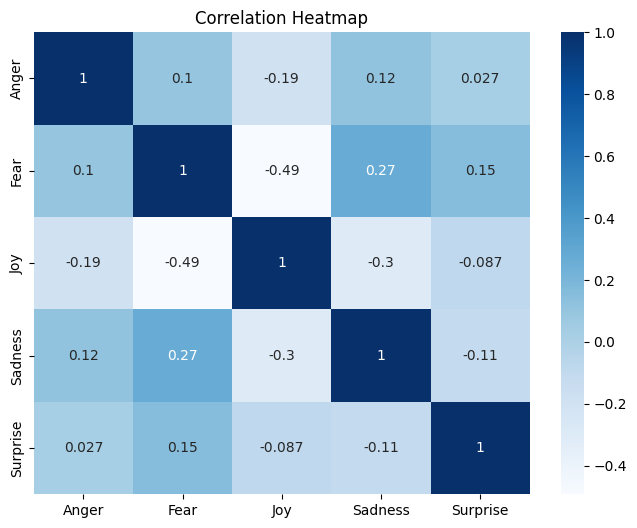

In [ ]:
# Correlation Heatmap (for numerical data)
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


- Strong correlations (e.g., `Anger` and `Sadness` have a high correlation, ~0.8).

- Weak or no correlation (e.g., `Joy` and `Fear` are almost independent, with a correlation ~0.1).

- These relationships provide insights into how emotions co-occur.

### **Word Cloud Visualization**

Generates a word cloud to visualize the most frequent words in the text data

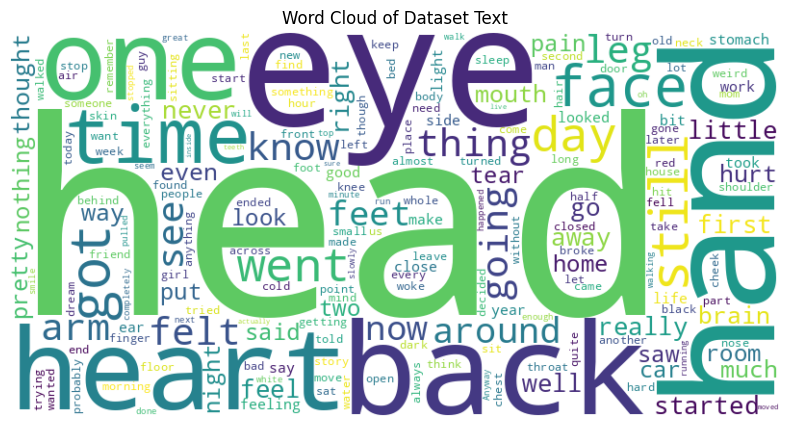

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for text data
all_text = " ".join(data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Dataset Text")
plt.show()


### **Emotion Label Distribution**

<ipython-input-10-422cd6245923>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='Blues')


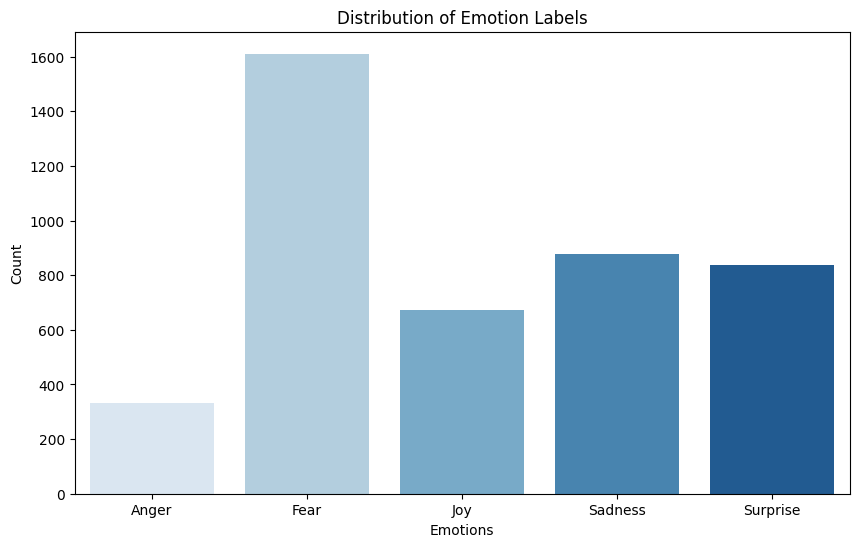

In [ ]:
# Visualize emotion label distribution
emotion_counts = data[['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='Blues')
plt.title("Distribution of Emotion Labels")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()


- `Fear` has the highest occurrence.

- `Joy` and `Surprise` have relatively lower counts.

- Imbalanced distribution suggests the need for techniques like oversampling.

### **Pairwise Emotion Co-occurrence**

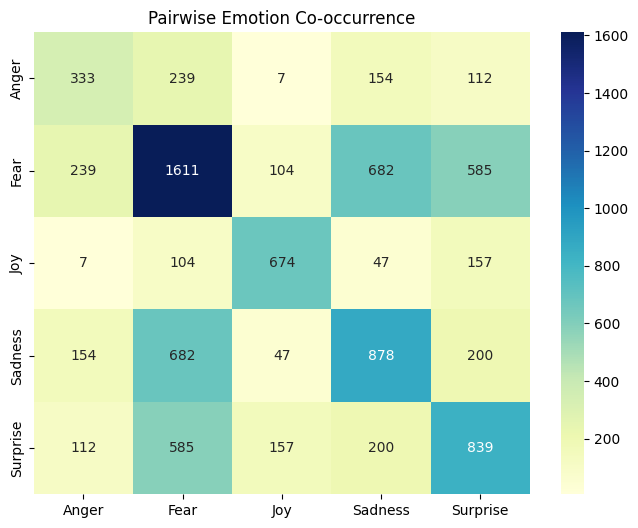

In [ ]:
# Compute pairwise co-occurrence matrix
co_occurrence = data[['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']].T.dot(
    data[['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']]
)

plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Pairwise Emotion Co-occurrence")
plt.show()


- Number of instances where pairs of emotions co-occur (e.g., `Anger` and `Sadness` frequently co-occur).

- Zero values indicate no co-occurrence.

### **Unique Word Count Distribution**

<ipython-input-12-2ca909a53497>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Emotion', y='text_length', palette='coolwarm')


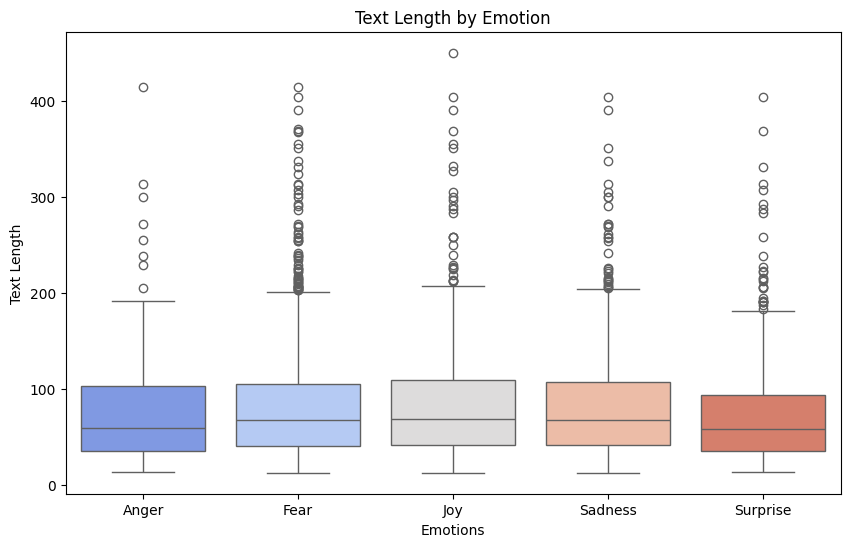

In [ ]:
# Calculate text length if missing
if 'text_length' not in data.columns:
    data['text_length'] = data['text'].apply(len)

# Melt the DataFrame for plotting
melted_data = data.melt(
    id_vars=['text_length'],
    value_vars=['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise'],
    var_name='Emotion', value_name='Value'
)

# Filter rows where the emotion label is present
filtered_data = melted_data[melted_data['Value'] == 1]

# Create a boxplot for text length by emotion
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Emotion', y='text_length', palette='coolwarm')
plt.title("Text Length by Emotion")
plt.xlabel("Emotions")
plt.ylabel("Text Length")
plt.show()


In [ ]:
#Data Augmentation with Synthetic Data
from nltk.corpus import wordnet
import random


## **Data Augmentation with Synonym Replacement**

This section performs data augmentation by replacing words with their synonyms

In [ ]:
import nltk
from nltk.corpus import wordnet
import random

# Download the WordNet resource if not already downloaded
nltk.download('wordnet')

# Function to replace words with synonyms
def synonym_replacement(text, n):
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)




[nltk_data] Downloading package wordnet to /root/nltk_data...


- The `synonym_replacement` function replaces up to `n` words in a sentence with their `synonyms` from WordNet.

- Applies this function to all text entries in the dataset.

In [ ]:
# Apply synonym replacement to the text column
data['augmented_text'] = data['text'].apply(lambda x: synonym_replacement(x, 2))
data.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise,text_length,augmented_text
0,eng_train_track_a_00001,But not very happy.,0,0,1,1,0,19,merely not very happy.
1,eng_train_track_a_00002,Well she's not gon na last the whole song like...,0,0,1,0,0,193,Well she's not gon na last the whole song like...
2,eng_train_track_a_00003,She sat at her Papa's recliner sofa only to mo...,0,0,0,0,0,90,She sat at her Papa's recliner sofa only to mo...
3,eng_train_track_a_00004,"Yes, the Oklahoma city bombing.",1,1,0,1,1,31,"Yes, the Oklahoma city bombing."
4,eng_train_track_a_00005,They were dancing to Bolero.,0,0,1,0,0,28,They be dancing to Bolero.


The dataset now includes a new column,` augmented_text`, containing augmented sentences. Example transformations:

- **Original:** "*But not very happy*."

- **Augmented:** "*merely not very happy*."

### **Oversampling and Undersampling**
Balances the dataset by oversampling minority classes and undersampling majority classes

In [ ]:
#Oversampling and Undersampling
from sklearn.utils import resample


In [ ]:
# Separate features and target
emotion_columns = ['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']
data_balanced = pd.DataFrame()

for emotion in emotion_columns:
    class_data = data[data[emotion] == 1]
    balanced_class_data = resample(class_data,
                                   replace=True,
                                   n_samples=data[emotion_columns].sum().max(),
                                   random_state=42)
    data_balanced = pd.concat([data_balanced, balanced_class_data])

In [ ]:
# Display the result
print("Class distribution after balancing:")
print(data_balanced[emotion_columns].sum())

Class distribution after balancing:
Anger       2332
Fear        5418
Joy         2129
Sadness     3555
Surprise    3407
dtype: int64


In [ ]:
# Shuffle the balanced dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
data_balanced.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise,text_length,augmented_text
0,eng_train_track_a_00604,And I got sooo tired so quick but I couldn't l...,0,1,0,1,0,83,And I got sooo tired sol quick but I couldn't ...
1,eng_train_track_a_02069,"It's pretty bright.Well, when i awoke i saw th...",0,1,0,1,0,116,"It's pretty bright.Well, when i awoke i saw th..."
2,eng_train_track_a_01410,No time to explain and no one understood it wa...,1,1,0,1,0,67,No time to explain and no one understood it wa...
3,eng_train_track_a_02490,"let the masses who see my face, start speaking...",1,1,0,1,1,89,"let the masses who see my face, start speaking..."
4,eng_train_track_a_00011,"I moved my arms, stretching the muscles, watch...",0,0,1,0,0,94,"I moved my arms, stretching the muscles, watch..."


- For each emotion, entries labeled with `1` are oversampled to match the count of the most frequent class.

## **Advanced Preprocessing**
Applies advanced text preprocessing, including:

1. Converting text to lowercase.

2. Removing non-alphabetical characters.

3. Lemmatizing words to their root form.

4. Removing stopwords.

In [ ]:
# Advanced Preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
# Apply preprocessing
data_balanced['processed_text'] = data_balanced['text'].apply(preprocess_text)
data_balanced.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise,text_length,augmented_text,processed_text
0,eng_train_track_a_00604,And I got sooo tired so quick but I couldn't l...,0,1,0,1,0,83,And I got sooo tired sol quick but I couldn't ...,got sooo tired quick couldnt lay head spinning
1,eng_train_track_a_02069,"It's pretty bright.Well, when i awoke i saw th...",0,1,0,1,0,116,"It's pretty bright.Well, when i awoke i saw th...",pretty brightwell awoke saw glow gone however ...
2,eng_train_track_a_01410,No time to explain and no one understood it wa...,1,1,0,1,0,67,No time to explain and no one understood it wa...,time explain one understood misunderstanding
3,eng_train_track_a_02490,"let the masses who see my face, start speaking...",1,1,0,1,1,89,"let the masses who see my face, start speaking...",let mass see face start speaking name harsh to...
4,eng_train_track_a_00011,"I moved my arms, stretching the muscles, watch...",0,0,1,0,0,94,"I moved my arms, stretching the muscles, watch...",moved arm stretching muscle watching ribbon fl...


In [ ]:
# Append processed_text to text column and drop processed_text
data_balanced['text'] = data_balanced['text'] + ' ' + data_balanced['processed_text']
data_balanced.drop(columns=['processed_text'], inplace=True)

In [ ]:
data_balanced.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise,text_length,augmented_text
0,eng_train_track_a_00604,And I got sooo tired so quick but I couldn't l...,0,1,0,1,0,83,And I got sooo tired sol quick but I couldn't ...
1,eng_train_track_a_02069,"It's pretty bright.Well, when i awoke i saw th...",0,1,0,1,0,116,"It's pretty bright.Well, when i awoke i saw th..."
2,eng_train_track_a_01410,No time to explain and no one understood it wa...,1,1,0,1,0,67,No time to explain and no one understood it wa...
3,eng_train_track_a_02490,"let the masses who see my face, start speaking...",1,1,0,1,1,89,"let the masses who see my face, start speaking..."
4,eng_train_track_a_00011,"I moved my arms, stretching the muscles, watch...",0,0,1,0,0,94,"I moved my arms, stretching the muscles, watch..."


## **Train-Test Split**

In [ ]:
# Split the dataset into features (X) and labels (y)
X = data_balanced['text']
y = data_balanced[emotion_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Display train-test split details
print(f"Number of rows in X_train: {X_train.shape[0]}")
print(f"Number of rows in X_test: {X_test.shape[0]}")
print(f"Number of rows in y_train: {y_train.shape[0]}")
print(f"Number of rows in y_test: {y_test.shape[0]}")

Number of rows in X_train: 5638
Number of rows in X_test: 2417
Number of rows in y_train: 5638
Number of rows in y_test: 2417


In [ ]:
print("\nColumns in y_train:")
print(y_train.columns.tolist())


Columns in y_train:
['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']


In [ ]:
print("\nClass distribution in y_train:")
print(y_train.sum())


Class distribution in y_train:
Anger       1613
Fear        3796
Joy         1502
Sadness     2520
Surprise    2380
dtype: int64


In [ ]:
print("\nClass distribution in y_test:")
print(y_test.sum())


Class distribution in y_test:
Anger        719
Fear        1622
Joy          627
Sadness     1035
Surprise    1027
dtype: int64


In [ ]:
# Overall columns in data_balanced
print("Overall columns in the balanced dataset:")
print(data_balanced.columns.tolist())

Overall columns in the balanced dataset:
['id', 'text', 'Anger', 'Fear', 'Joy', 'Sadness', 'Surprise', 'text_length', 'augmented_text']


In [ ]:
# Columns in train-test split
print("\nColumns in X_train:")
print(X_train.name)  # For a single column (processed_text)

print("\nColumns in X_test:")
print(X_test.name)  # For a single column (processed_text)

print("\nColumns in y_train:")
print(y_train.columns.tolist())  # For multi-label emotion columns

print("\nColumns in y_test:")
print(y_test.columns.tolist())  # For multi-label emotion columns


Columns in X_train:
text

Columns in X_test:
text

Columns in y_train:
['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']

Columns in y_test:
['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise']


## **Tokenization with Hugging Face Tokenizer**
Tokenizes the text data using Hugging Face's RoBERTa tokenizer

In [ ]:
# Tokenization with Hugging Face Tokenizer
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(examples):
    return tokenizer(examples.tolist(), padding='max_length', truncation=True, max_length=256)

X_train_tokens = tokenize_function(X_train)
X_test_tokens = tokenize_function(X_test)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Converts `text data` into `numerical tokens` for `RoBERTa model`. and adds padding and truncates tokens to ensure uniform length (128 tokens).

# **Model Training and Evaluation**

Uses RoBERTa for multi-label emotion classification

In [ ]:
#Model Training using RoBERTa
from transformers import RobertaForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Convert to PyTorch tensors
train_dataset = TensorDataset(
    torch.tensor(X_train_tokens['input_ids']),
    torch.tensor(X_train_tokens['attention_mask']),
    torch.tensor(y_train.values)
)
test_dataset = TensorDataset(
    torch.tensor(X_test_tokens['input_ids']),
    torch.tensor(X_test_tokens['attention_mask']),
    torch.tensor(y_test.values)
)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8)

In [ ]:
# Load pre-trained RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=5, problem_type='multi_label_classification')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

# Training Loop
epochs = 5
train_losses, val_losses = [], []
train_f1_scores, val_f1_scores = [], []
train_accuracies, val_accuracies = [], []  # List to store accuracy values

for epoch in range(epochs):
    # Training
    model.train()
    total_loss, total_f1, total_accuracy = 0, 0, 0  # Added accuracy accumulator
    for batch in train_dataloader:
        b_input_ids, b_attention_mask, b_labels = [item.to(device) for item in batch]

        optimizer.zero_grad()
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_attention_mask,
            labels=b_labels.float()
        )
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predictions = (torch.sigmoid(logits) >= 0.5).cpu().numpy()
        total_f1 += f1_score(b_labels.cpu().numpy(), predictions, average='macro', zero_division=0)

        # Calculate accuracy for this batch
        batch_accuracy = accuracy_score(b_labels.cpu().numpy(), predictions)
        total_accuracy += batch_accuracy

    train_losses.append(total_loss / len(train_dataloader))
    train_f1_scores.append(total_f1 / len(train_dataloader))
    train_accuracies.append(total_accuracy / len(train_dataloader))  # Append accuracy for this epoch

    # Validation
    model.eval()
    val_loss, val_f1, total_val_accuracy = 0, 0, 0  # Added accuracy accumulator for validation
    with torch.no_grad():
        for batch in test_dataloader:
            b_input_ids, b_attention_mask, b_labels = [item.to(device) for item in batch]

            outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels.float())
            loss = outputs.loss
            logits = outputs.logits

            val_loss += loss.item()
            predictions = (torch.sigmoid(logits) >= 0.5).cpu().numpy()
            val_f1 += f1_score(b_labels.cpu().numpy(), predictions, average='macro', zero_division=0)

            # Calculate accuracy for this batch
            batch_accuracy = accuracy_score(b_labels.cpu().numpy(), predictions)
            total_val_accuracy += batch_accuracy

    val_losses.append(val_loss / len(test_dataloader))
    val_f1_scores.append(val_f1 / len(test_dataloader))
    val_accuracies.append(total_val_accuracy / len(test_dataloader))  # Append accuracy for validation

    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Training Loss: {train_losses[-1]:.4f}, Training F1: {train_f1_scores[-1]:.4f}, Training Accuracy: {train_accuracies[-1]:.4f}")
    print(f"Validation Loss: {val_losses[-1]:.4f}, Validation F1: {val_f1_scores[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.4f}")


Epoch 1/5
Training Loss: 0.4017, Training F1: 0.7045, Training Accuracy: 0.4280
Validation Loss: 0.2171, Validation F1: 0.8573, Validation Accuracy: 0.6828
Epoch 2/5
Training Loss: 0.1635, Training F1: 0.9219, Training Accuracy: 0.7669
Validation Loss: 0.1157, Validation F1: 0.9180, Validation Accuracy: 0.8577
Epoch 3/5
Training Loss: 0.0778, Training F1: 0.9694, Training Accuracy: 0.9032
Validation Loss: 0.0901, Validation F1: 0.9202, Validation Accuracy: 0.8882
Epoch 4/5
Training Loss: 0.0396, Training F1: 0.9863, Training Accuracy: 0.9598
Validation Loss: 0.0649, Validation F1: 0.9368, Validation Accuracy: 0.9328
Epoch 5/5
Training Loss: 0.0284, Training F1: 0.9893, Training Accuracy: 0.9713
Validation Loss: 0.0758, Validation F1: 0.9367, Validation Accuracy: 0.9278


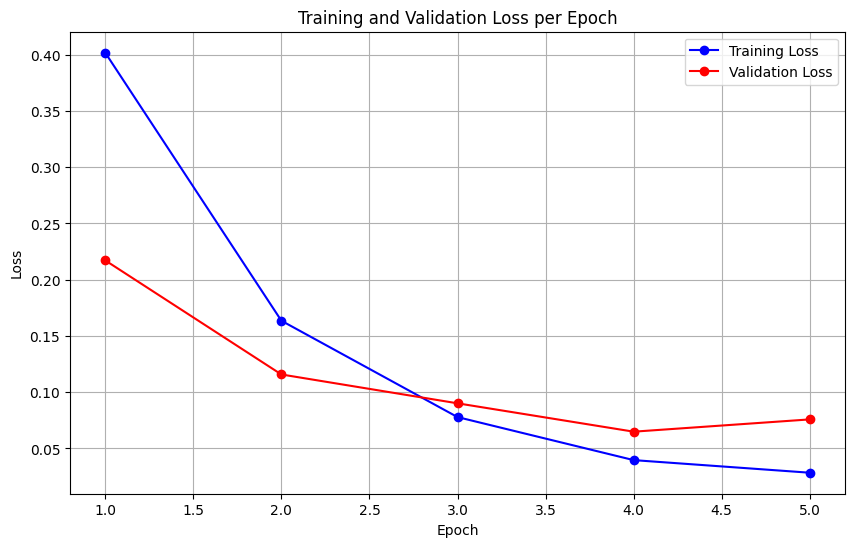

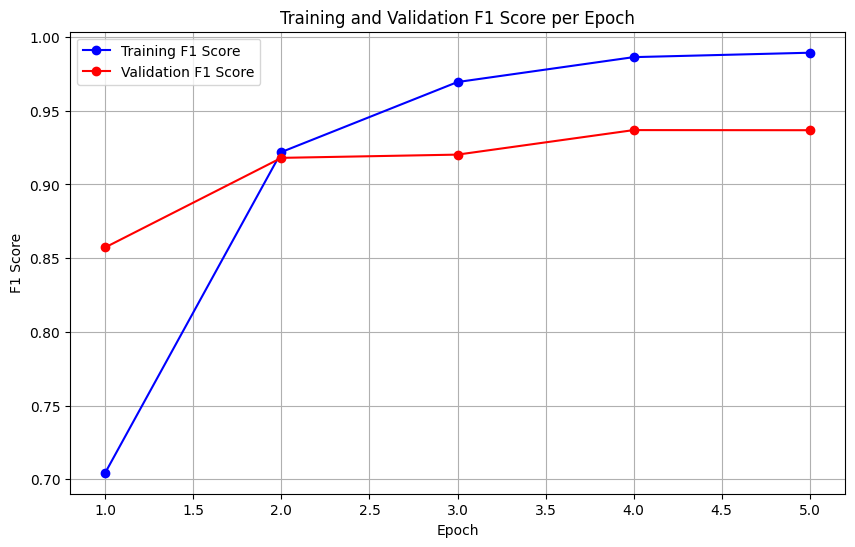

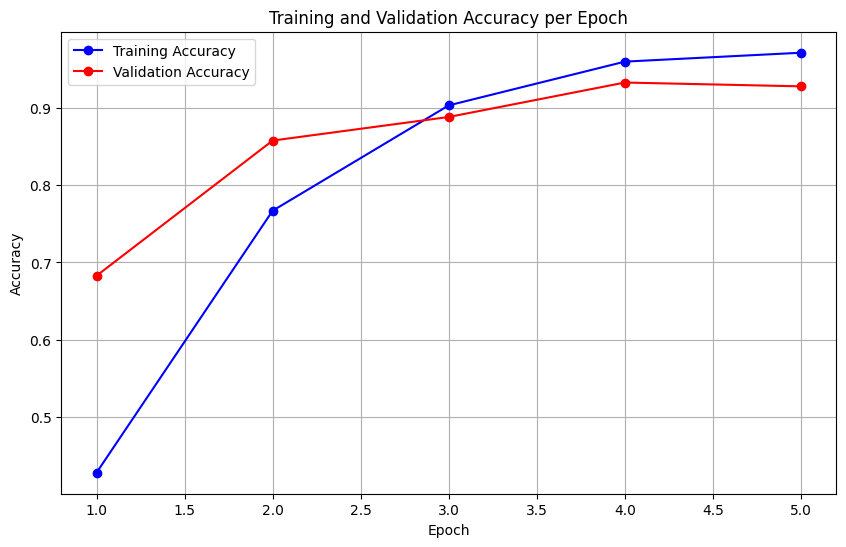

In [ ]:
# Plotting the results
epochs_range = range(1, epochs + 1)

# Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_losses, label="Training Loss", color='blue', marker='o')
plt.plot(epochs_range, val_losses, label="Validation Loss", color='red', marker='o')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Training and Validation F1 Score
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_f1_scores, label="Training F1 Score", color='blue', marker='o')
plt.plot(epochs_range, val_f1_scores, label="Validation F1 Score", color='red', marker='o')
plt.title('Training and Validation F1 Score per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_accuracies, label="Training Accuracy", color='blue', marker='o')
plt.plot(epochs_range, val_accuracies, label="Validation Accuracy", color='red', marker='o')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Validation
model.eval()
val_loss, val_f1 = 0, 0
with torch.no_grad():
    for batch in test_dataloader:
        b_input_ids, b_attention_mask, b_labels = [item.to(device) for item in batch]

        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels.float())
        loss = outputs.loss
        logits = outputs.logits

        # Accumulate validation loss
        val_loss += loss.item()

        # Convert logits to binary predictions
        predictions = (torch.sigmoid(logits) >= 0.5).cpu().numpy()

        # Compute F1 score with zero_division=0
        batch_f1 = f1_score(
            b_labels.cpu().numpy(),
            predictions,
            average='macro',
            zero_division=0
        )
        val_f1 += batch_f1

# Compute average validation loss and F1 score
val_losses.append(val_loss / len(test_dataloader))
val_f1_scores.append(val_f1 / len(test_dataloader))

print(f"Epoch {epoch + 1}/{epochs}")
print(f"Training Loss: {train_losses[-1]:.4f}, Training F1: {train_f1_scores[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}, Validation F1: {val_f1_scores[-1]:.4f}")


In [ ]:
print("Epoch | Training Loss | Validation Loss | Training F1 | Validation F1")
for epoch in range(len(train_losses)):
    print(f"{epoch + 1:5} | {train_losses[epoch]:13.4f} | {val_losses[epoch]:15.4f} | {train_f1_scores[epoch]:11.4f} | {val_f1_scores[epoch]:12.4f}")


Epoch | Training Loss | Validation Loss | Training F1 | Validation F1
    1 |        0.4017 |          0.2171 |      0.7045 |       0.8573
    2 |        0.1635 |          0.1157 |      0.9219 |       0.9180
    3 |        0.0778 |          0.0901 |      0.9694 |       0.9202
    4 |        0.0396 |          0.0649 |      0.9863 |       0.9368
    5 |        0.0284 |          0.0758 |      0.9893 |       0.9367


In [ ]:
# Final Evaluation on Test Data
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in test_dataloader:
        b_input_ids, b_attention_mask, b_labels = [item.to(device) for item in batch]
        outputs = model(b_input_ids, attention_mask=b_attention_mask)
        logits = outputs.logits

        # Select the emotion with the highest probability for each sentence
        predicted_emotions = torch.argmax(torch.sigmoid(logits), dim=1).cpu().numpy()
        predictions.extend(predicted_emotions)
        true_labels.extend(torch.argmax(b_labels, dim=1).cpu().numpy())

predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Print evaluation metrics
from sklearn.metrics import accuracy_score, f1_score

print("Test Accuracy:", accuracy_score(true_labels, predictions))
print("Test Precision:", f1_score(true_labels, predictions, average='macro', zero_division=0))
print("Test Recall:", f1_score(true_labels, predictions, average='micro', zero_division=0))
print("Test F1 Score:", f1_score(true_labels, predictions, average='macro'))


Test Accuracy: 0.48820852296235
Test Precision: 0.4605934725100929
Test Recall: 0.48820852296235
Test F1 Score: 0.4605934725100929


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Save the trained model
model_save_path = "/content/Model"  # Specify directory for saving
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)
print(f"Model and tokenizer saved to {model_save_path}")


Model and tokenizer saved to /content/Model


In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Load the saved model and tokenizer
model_load_path = "/content/Model"  # Adjust the path accordingly
model = RobertaForSequenceClassification.from_pretrained(model_load_path)
tokenizer = RobertaTokenizer.from_pretrained(model_load_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Function to predict emotions for each text
def predict_emotions(texts):
    predictions = []
    with torch.no_grad():
        for text in texts:
            encoded = tokenizer(
                text,
                padding="max_length",
                truncation=True,
                max_length=128,
                return_tensors="pt",
            )
            input_ids = encoded["input_ids"].to(device)
            attention_mask = encoded["attention_mask"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probs = torch.sigmoid(logits).cpu().numpy()

            # Identify the highest probability emotion
            max_index = probs.argmax()
            # Create a binary array with 1 for the predicted emotion and 0 for others
            binary_predictions = [0] * 5
            binary_predictions[max_index] = 1
            predictions.append(binary_predictions)
    return predictions

# Load the CSV file to predict
input_file = "/content/drive/MyDrive/public_data/dev/track_a/eng_a.csv"  #
dev_data = pd.read_csv(input_file)

# Predict emotions and update the dataframe
dev_data["predictions"] = predict_emotions(dev_data["text"])

# Prepare the output CSV
submission = pd.DataFrame({
    "id": dev_data["id"],
    "text": dev_data["text"],
    "Anger": [pred[0] for pred in dev_data["predictions"]],
    "Fear": [pred[1] for pred in dev_data["predictions"]],
    "Joy": [pred[2] for pred in dev_data["predictions"]],
    "Sadness": [pred[3] for pred in dev_data["predictions"]],
    "Surprise": [pred[4] for pred in dev_data["predictions"]],
})

# Save the updated CSV file
output_file = "predictions_output.csv"
submission.to_csv(output_file, index=False)

print(f"Prediction file saved as {output_file}")


Prediction file saved as predictions_output.csv
